# Algerian Forest Fires Dataset Project EDA Part

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps


## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.

### Description of all the Columns in the Dataset: -
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

## Data Cleaning

In [7]:
df[df.isnull().any(axis=1)]         #Rows having null values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


This dataset contains 2 section: 
1. Bejaia Region Dataset
2. Sidi-Bel Abbes Region Dataset

So we break the dataset into two Region

In [8]:
df.loc[:121,'Region'] = 1
df.loc[123:,'Region'] = 2

In [9]:
df = df.dropna().reset_index(drop=True)

In [10]:
# Remove the 122th row
df= df.drop(122).reset_index(drop=True)

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.shape

(243, 15)

### Converting the desired Column to int datatype

In [13]:
df[['day','month','Temperature','RH','Ws','Region']] = df[['day','month','Temperature','RH','Ws','Region']].astype(int)

### Converting the desired Column to float datatype

In [14]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(6), object(2)
memory usage: 22.9+ KB


In [16]:
df[df.duplicated()]     #checking for duplicate data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


### Looks like there are some mismatch in the  `Classes` Column

In [17]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [18]:
df.Classes = df.Classes.str.strip()

In [19]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [20]:
# df['Classes'] = df['Classes'].map({'not fire':0,'fire':1})

In [21]:
percent = df.Classes.value_counts(normalize=True) * 100
percent

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

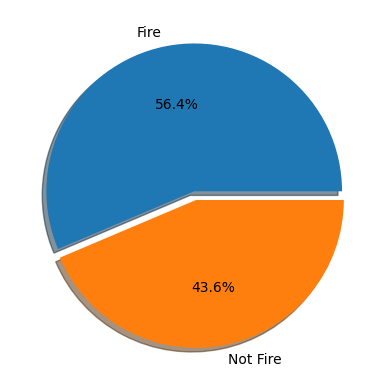

In [22]:
labels =['Fire','Not Fire']
plt.pie(x=percent,labels=labels,autopct='%1.1f%%',shadow=True,explode=[0.02,0.04])
plt.show()

## Visualization

In [23]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
181,31,7,2012,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3,14.5,fire,2
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,2
218,6,9,2012,34,71,14,6.5,64.5,3.3,9.1,1.0,3.5,0.4,not fire,2
154,3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,fire,2
36,7,7,2012,35,64,18,0.2,80.0,9.7,40.4,2.8,12.1,3.2,not fire,1


<Axes: xlabel='Temperature', ylabel='Rain'>

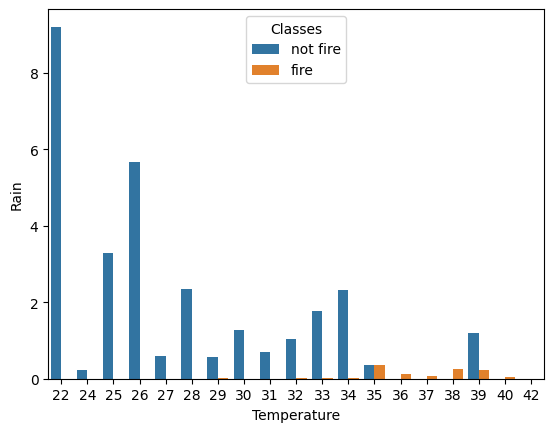

In [24]:
sns.barplot(data=df,y='Rain',x='Temperature',hue='Classes',errorbar=None)

<Axes: xlabel='Temperature', ylabel='Rain'>

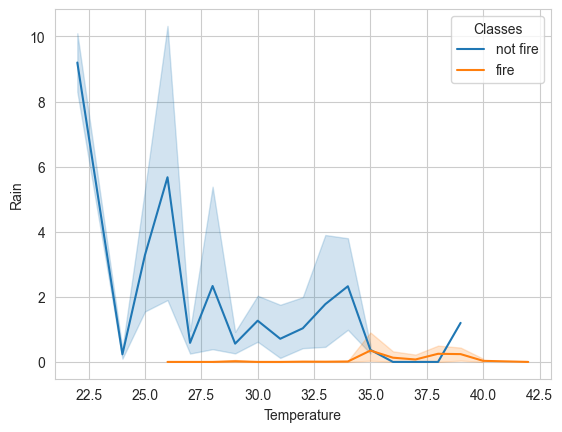

In [41]:
sns.lineplot(data=df,y='Rain',x='Temperature',hue='Classes')

### Conclusion: 

<Axes: xlabel='Classes', ylabel='Rain'>

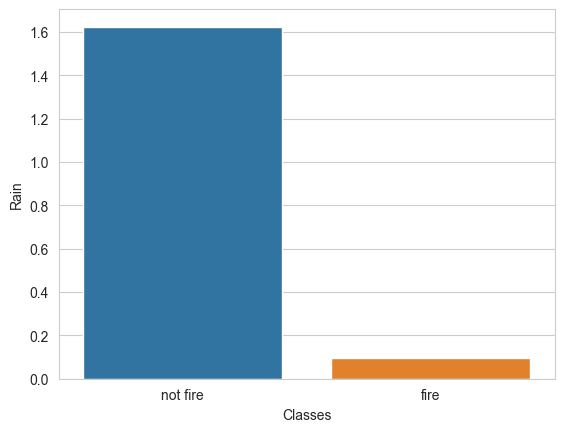

In [42]:
sns.barplot(data=df,y='Rain',x='Classes',errorbar=None)

<Axes: xlabel='month', ylabel='Rain'>

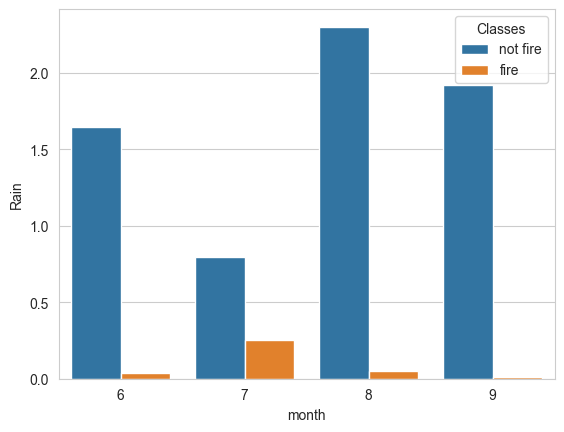

In [43]:
sns.barplot(data=df,y='Rain',x='month',hue='Classes',errorbar=None)

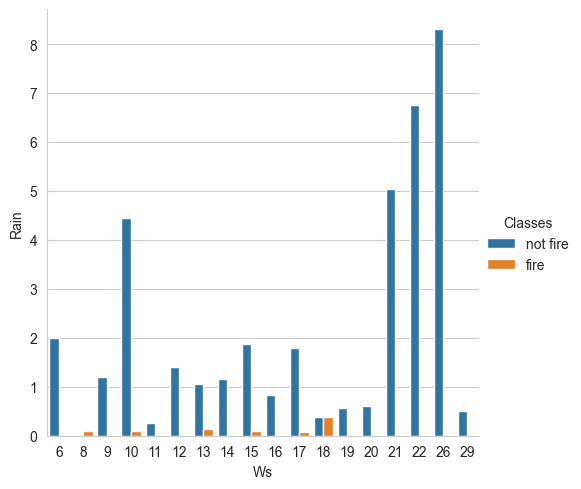

In [44]:
sns.catplot(data=df,x='Ws',y='Rain',kind='bar',hue='Classes',errorbar=None)

<Axes: xlabel='FFMC', ylabel='DMC'>

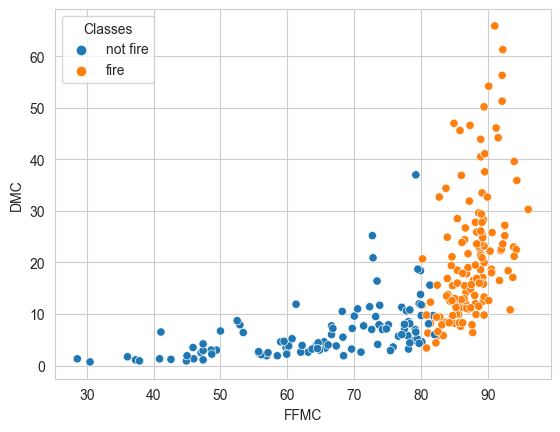

In [45]:
# Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
# Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 

sns.scatterplot(data=df,x='FFMC',y='DMC',hue='Classes')

<Axes: xlabel='FFMC', ylabel='DMC'>

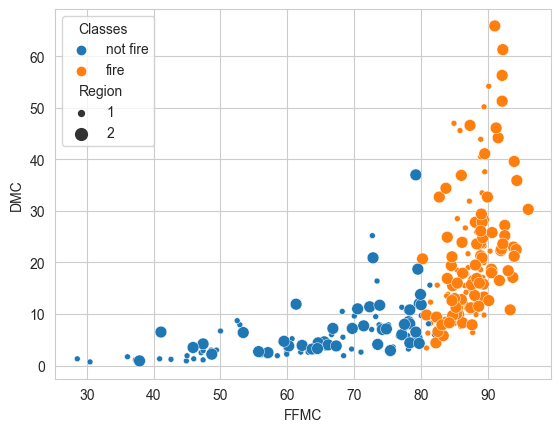

In [46]:
sns.scatterplot(data=df,x='FFMC',y='DMC',hue='Classes',size='Region')

In [47]:
df1 = df.drop(['day','month','year'],axis=1)

### Correlation between the Numerical Columns

<Axes: >

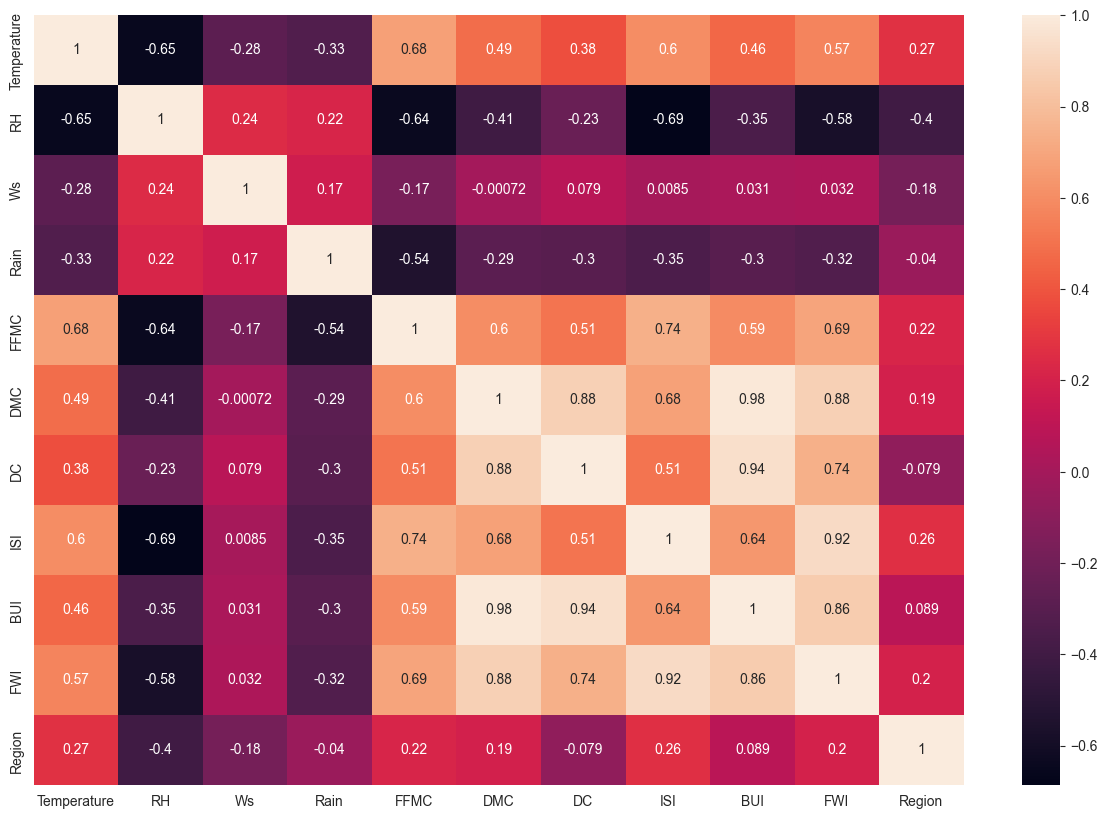

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

## Month Wise Analysis

In [49]:
df_b = df.loc[df['Region'] == 1]
df_s = df.loc[df['Region'] == 2]
df_b.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


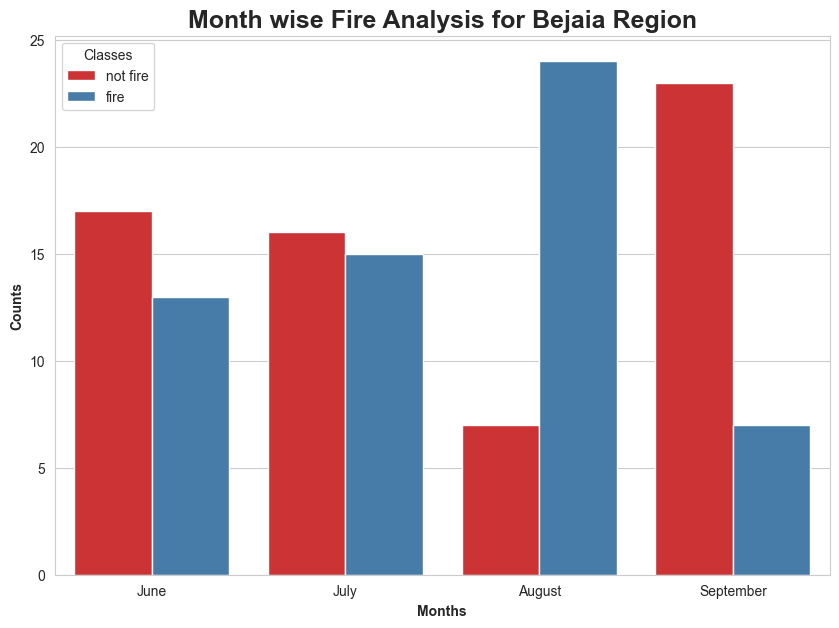

In [50]:
plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(data=df_b,x='month',hue='Classes',palette='Set1')
plt.title('Month wise Fire Analysis for Bejaia Region',fontsize=18,weight='bold')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.xlabel('Months',fontsize=10,weight='bold')
plt.ylabel('Counts',fontsize=10,weight='bold')
plt.show()
plt.show()

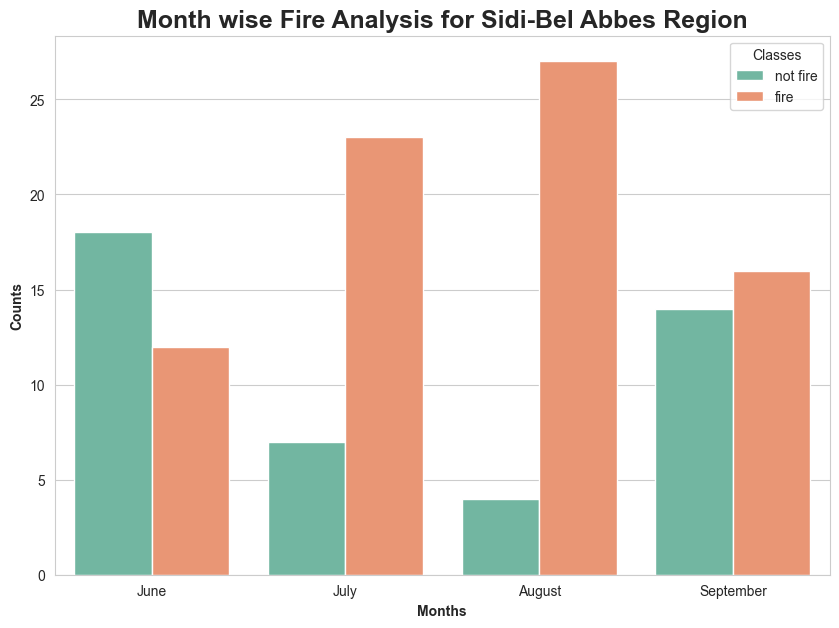

In [51]:
plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(data=df_s,x='month',hue='Classes',palette='Set2')
plt.title('Month wise Fire Analysis for Sidi-Bel Abbes Region',fontsize=18,weight='bold')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.xlabel('Months',fontsize=10,weight='bold')
plt.ylabel('Counts',fontsize=10,weight='bold')
plt.show()
plt.show()

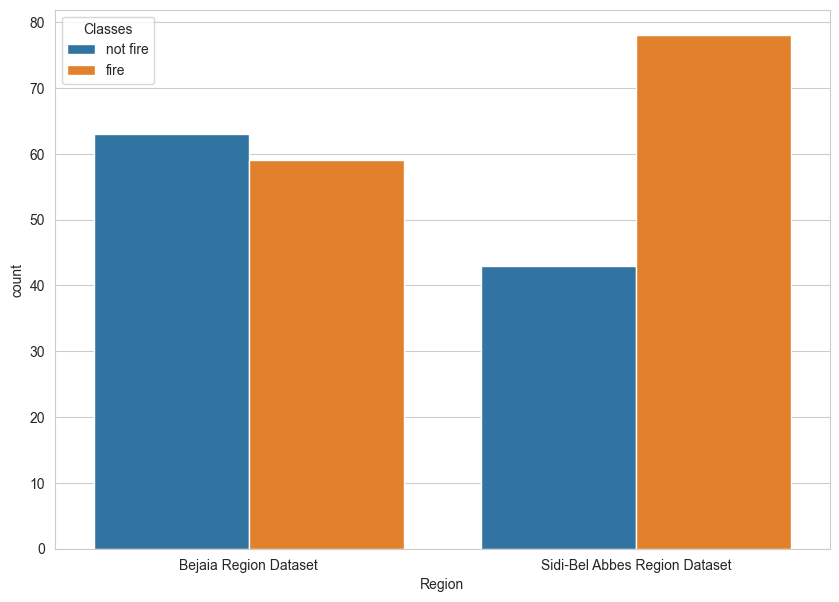

In [52]:
plt.subplots(figsize=(10,7))
sns.countplot(data=df,x='Region',hue='Classes')
plt.xticks(np.arange(2),labels=['Bejaia Region Dataset','Sidi-Bel Abbes Region Dataset'])
plt.show()

In [53]:
# Verification
print("Number of Fires in Bejaia Region: ",df[(df['Region']==1) &  (df['Classes'] == 'fire')].value_counts().count())
print("Number of NO Fires in Bejaia Region: ",df[(df['Region']==1) &  (df['Classes'] == 'not fire')].value_counts().count())
print('_________________________________________\n')
print("Number of Fires in Sidi-Bel Region: ",df[(df['Region']==2) &  (df['Classes'] == 'fire')].value_counts().count())
print("Number of NO Fires in Sidi-Bel Region: ",df[(df['Region']==2) &  (df['Classes'] == 'not fire')].value_counts().count())


Number of Fires in Bejaia Region:  59
Number of NO Fires in Bejaia Region:  63
_________________________________________

Number of Fires in Sidi-Bel Region:  78
Number of NO Fires in Sidi-Bel Region:  43
